### Artificial Neural Network from scratch

This python notebook contains the assignment questions for candidates who've applied for internships with us. Unlike the Java assignment, the python one requires candidates to share code with us. The assignment revolves around neural networks - the model architecture used for deep learning based tasks. You would be tested on some of the concepts of Neural Networks. In fact, we will be guiding you through the process of coding your own neural network in python from scratch. 

The places where you need to add code are marked with the word [TASK] In all there are 9 tasks throughout the notebook. Once you've made changes to the code below, you can send us your notebook files to vikash@kiotalabs.com or aditya@kiotalabs.com. Hope you all have fun setting it up.

**Please note**: this assignment has borrowed code from similar tutorials that exist elsewhere. We could add references to give credit to the original authors, but that would jeopardize the selection process which relies on the following questions.  

Let's start

In [43]:
# Import the required packages
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy

In [44]:
# Display plots in notebook 
%matplotlib inline
# Define plot's default figure size
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

First of all we'll read the input dataset which the Neural Network will use to train a classifier model.

In [45]:
#read the datasets
train = pd.read_csv("ann_data.csv")

In [46]:
X, y = np.array(train.iloc[:,0:2]), np.array(train.iloc[:,2])

In [47]:
X.shape

(500, 2)

In [48]:
X.shape

(500, 2)

In [49]:
y.shape

(500,)

In [50]:
train.head()

,Feature1,Feature2,Target
0,2.067788,0.258133,1
1,0.993994,-0.609145,1
2,-0.690315,0.749921,0
3,1.023582,0.529003,0
4,0.700747,-0.496724,1


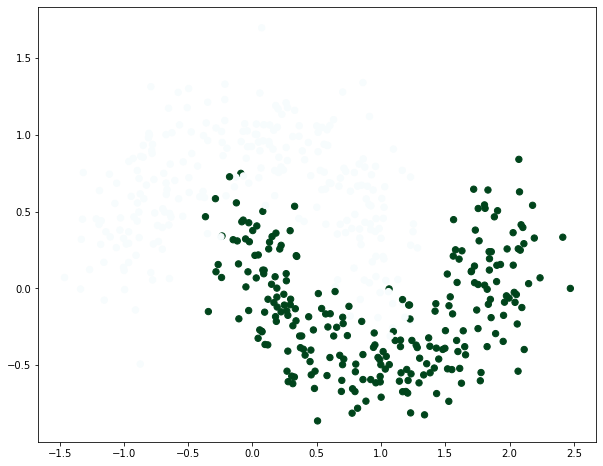

In [51]:
#Let's plot the dataset and see how it is
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.BuGn)

As you can see, the data points have been assigned one of two labels. The task of the classifier is to model the training data, so that it can assign a binary value to samples in the test set. Let's start with the simplest functions.  

**Function to generate a random number, given two numbers**

In [52]:
import random
random.seed(123)

# calculate a random number where:  a <= rand < b
def rand(a, b):
    return (b-a)*random.random() + a

**Function to generate a matrix with given dimensions**

In [53]:
# Make a matrix 
def makeMatrix(I, J, fill=0.0):
    return np.zeros([I,J])

**Task**: Implement the sigmoid function. It would be used as the activation function for the neural network.

In [54]:
# implement the sigmoid function below
def sigmoid(x):
    return 1/(1+np.exp(-x))

**Task**: Implement the derivative of the sigmoid function in terms of the output variable. If the output of the sigmoid function in `y` then the function should take `y` as an argument and return the derivative of the sigmoid.

In [55]:
def dsigmoid(y):
    return sigmoid(y)*(1-sigmoid(y))

In [ ]:
### Using the above function for derivate of sigmoid instead of a more conventional y - y**2 has it's computational speedup advantages. 
### I learned this at https://beckernick.github.io/sigmoid-derivative-neural-network/

As mentioned earlier, the sigmoid function is used as the activation function for the nodes in the hidden layer of the neural network. A simple neural network that has atleast one hidden layer between the input and the output layer is called a **Multi Layer Perceptron**. We will be creating an MLP from scratch in the following section. 

To keep things simple, our MLP will have only one hidden layer. We start by defining the variables we need to lay out the architecture - these include 
1. the number of nodes in the input layer, our single hidden layer and the output layer. 
2. The initial weights to be used for the different layers. These weights will be randomly initiated.

The architecture defined above is captured in the following class which we'll be using for our ANN.


In [56]:
class MLP:
    def __init__(self, ni, nh, no):
        # number of nodes in the input, hidden, and output layer
        self.ni = ni + 1 # +1 for bias node
        self.nh = nh
        self.no = no

        # activations for nodes
        self.ai = [1.0]*self.ni
        self.ah = [1.0]*self.nh
        self.ao = [1.0]*self.no

        # create weights
        self.wi = makeMatrix(self.ni, self.nh)
        self.wo = makeMatrix(self.nh, self.no)

        # set them to random vaules
        self.wi = rand(-0.2, 0.2, size=self.wi.shape)
        self.wo = rand(-2.0, 2.0, size=self.wo.shape)

        # last change in weights for momentum   
        self.ci = makeMatrix(self.ni, self.nh)
        self.co = makeMatrix(self.nh, self.no)

To this class, we need to add the activation component and the backpropogation mechanism. Luckily we already have part of the function defined earlier as the **sigmoid** function. We'll be using it below as follows

In [57]:
def activate(self, inputs):

    if len(inputs) != self.ni-1:
        print(inputs)
        raise ValueError('wrong number of inputs')

    # input activations
    for i in range(self.ni-1):
        self.ai[i] = inputs[i]

    # hidden activations
    for j in range(self.nh):
        sum_h = 0.0
        for i in range(self.ni):
            sum_h += self.ai[i] * self.wi[i][j]
        self.ah[j] = sigmoid(sum_h)

    # output activations
    for k in range(self.no):
        sum_o = 0.0
        for j in range(self.nh):
            sum_o += self.ah[j] * self.wo[j][k]
        self.ao[k] = sigmoid(sum_o)

    return self.ao[:]

For the backpropagation code, we need to calculate the error terms for each node as well as the weight update step. The following code has the implementation for the output layer. You are required to add the implementation for the hidden layer to the same code.

In [45]:
def backPropagate(self, targets, N, M):

    if len(targets) != self.no:
        print(targets)
        raise ValueError('wrong number of target values')

    # calculate error terms for output
    output_deltas = np.zeros(self.no)
    for k in range(self.no):
        error = targets[k]-self.ao[k]
        output_deltas[k] = dsigmoid(self.ao[k]) * error

    # calculate error terms for hidden
    hidden_deltas = np.zeros(self.nh)
    for j in range(self.nh):
        error = 0.0
        for k in range(self.no):
            error += output_deltas[k]*self.wo[j][k]
        hidden_deltas[j] = dsigmoid(self.ah[j]) * error

    # update output weights
    for j in range(self.nh):
        for k in range(self.no):
            change = output_deltas[k] * self.ah[j]
            self.wo[j][k] += N*change + M*self.co[j][k]
            self.co[j][k] = change

    # update input weights
    for i in range(self.ni):
        for j in range(self.nh):
            change = hidden_deltas[j]*self.ai[i]
            self.wi[i][j] += N*change + M*self.ci[i][j]
            self.ci[i][j] = change

    # calculate error
    error = 0.0
    for k in range(len(targets)):
        error += 0.5*(targets[k]-self.ao[k])**2
    return error


#### Putting it all together 
In the following code, we need to include the two functions written above - `activate` and `backPropagate` in the `MLP` class defined earlier. 

In [59]:
# Putting all together

class MLP:
    def __init__(self, ni, nh, no):
        # number of input, hidden, and output nodes
        self.ni = ni + 1 # +1 for bias node
        self.nh = nh
        self.no = no

        # activations for nodes
        self.ai = [1.0]*self.ni
        self.ah = [1.0]*self.nh
        self.ao = [1.0]*self.no

        # create weights
        self.wi = makeMatrix(self.ni, self.nh)
        self.wo = makeMatrix(self.nh, self.no)

        # set them to random vaules
        for i in range(self.ni):
            for j in range(self.nh):
                self.wi[i][j] = rand(-0.2, 0.2)
        for j in range(self.nh):
            for k in range(self.no):
                self.wo[j][k] = rand(-2.0, 2.0)

        # last change in weights for momentum   
        self.ci = makeMatrix(self.ni, self.nh)
        self.co = makeMatrix(self.nh, self.no)


    def backPropagate(self, targets, N, M):

        if len(targets) != self.no:
            print(targets)
            raise ValueError('wrong number of target values')

        # calculate error terms for output
        output_deltas = np.zeros(self.no)
        for k in range(self.no):
            error = targets[k]-self.ao[k]
            output_deltas[k] = dsigmoid(self.ao[k]) * error

        # calculate error terms for hidden
        hidden_deltas = np.zeros(self.nh)
        for j in range(self.nh):
            error = 0.0
            for k in range(self.no):
                error += output_deltas[k]*self.wo[j][k]
            hidden_deltas[j] = dsigmoid(self.ah[j]) * error

        # update output weights
        for j in range(self.nh):
            for k in range(self.no):
                change = output_deltas[k] * self.ah[j]
                self.wo[j][k] += N*change + M*self.co[j][k]
                self.co[j][k] = change

        # update input weights
        for i in range(self.ni):
            for j in range(self.nh):
                change = hidden_deltas[j]*self.ai[i]
                self.wi[i][j] += N*change + M*self.ci[i][j]
                self.ci[i][j] = change

        # calculate error
        error = 0.0
        for k in range(len(targets)):
            error += 0.5*(targets[k]-self.ao[k])**2
        return error


    def test(self, patterns):
        self.predict = np.empty([len(patterns), self.no])
        for i, p in enumerate(patterns):
            self.predict[i] = self.activate(p)
            #self.predict[i] = self.activate(p[0])

    def activate(self, inputs):

        if len(inputs) != self.ni-1:
            print(inputs)
            raise ValueError('wrong number of inputs')

        # input activations
        for i in range(self.ni-1):
            self.ai[i] = inputs[i]

        # hidden activations
        for j in range(self.nh):
            sum_h = 0.0
            for i in range(self.ni):
                sum_h += self.ai[i] * self.wi[i][j]
            self.ah[j] = sigmoid(sum_h)

        # output activations
        for k in range(self.no):
            sum_o = 0.0
            for j in range(self.nh):
                sum_o += self.ah[j] * self.wo[j][k]
            self.ao[k] = sigmoid(sum_o)

        return self.ao[:]


    def train(self, patterns, iterations=1000, N=0.5, M=0.1):
        # N: learning rate
        # M: momentum factor
        patterns = list(patterns)
        for i in range(iterations):
            error = 0.0
            for p in patterns:
                inputs = p[0]
                targets = p[1]
                self.activate(inputs)
                error += self.backPropagate([targets], N, M)
            if i % 5 == 0:
                print('error in interation %d : %-.5f' % (i,error))
            print('Final training error: %-.5f' % error)


### Running the model on our dataset

In [60]:
# create a network with two inputs, one hidden, and one output nodes
ann = MLP(2, 1, 1)

%timeit -n 1 -r 1 ann.train(zip(X,y), iterations=2)

error in interation 0 : 51.87241
Final training error: 51.87241
Final training error: 47.96079
58.1 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


### Predicting on training dataset and measuring in-sample accuracy¶

In [61]:
%timeit -n 1 -r 1 ann.test(X)

9.86 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [62]:
prediction = pd.DataFrame(data=np.array([y, np.ravel(ann.predict)]).T, 
                          columns=["actual", "prediction"])
prediction.head()

,actual,prediction
0,1.0,0.500000
1,1.0,0.500000
2,0.0,0.028991
3,0.0,0.500000
4,1.0,0.500000


In [63]:
np.min(prediction.prediction)


0.02897513896936836

### Visualizing the results

In [64]:
# Helper function to plot a decision boundary.
# This generates the contour plot to show the decision boundary visually
def plot_decision_boundary(nn_model):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), 
                         np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    nn_model.test(np.c_[xx.ravel(), yy.ravel()])
    Z = nn_model.predict
    Z[Z>=0.5] = 1
    Z[Z<0.5] = 0
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], s=40,  c=y, cmap=plt.cm.BuGn)

Text(0.5, 1.0, 'Our initial model')

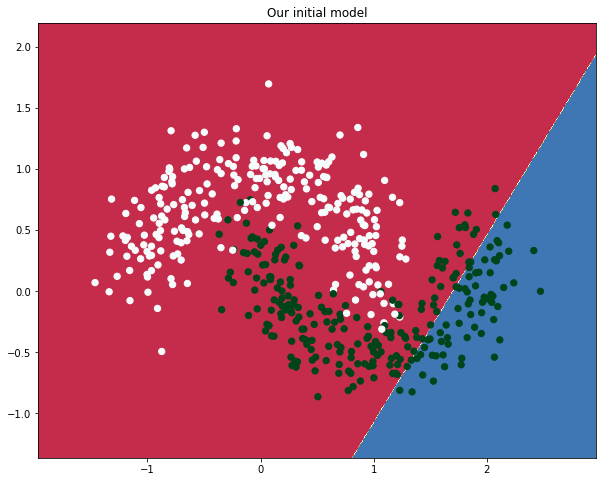

In [65]:
plot_decision_boundary(ann)
plt.title("Our initial model")

If you're not happy with the accuracy achieved by our neural network, you can try changing the architecture of the neural network. Try to train the neural network with 10 units in the hidden layer.

error in interation 0 : 31.76442
Final training error: 31.76442
Final training error: 25.33326
225 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


Text(0.5, 1.0, 'Our next model with 10 hidden units')

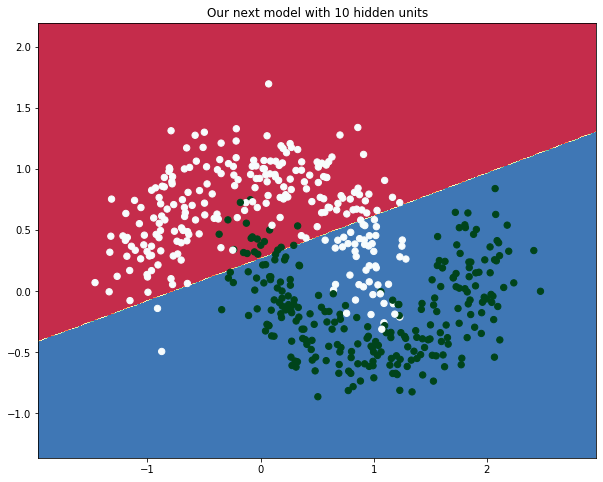

In [73]:
ann = MLP(2, 10, 1)
%timeit -n 1 -r 1 ann.train(zip(X,y), iterations=2)
plot_decision_boundary(ann)
plt.title("Our next model with 10 hidden units")


Now in practice you would never need to handcraft a neural network. There are amazing frameworks which do most of the heavy lifting for you. It's possible that some of you may already have experience with such framework and are doing highly significant work based on machine learning. It would be unfair to not let you share some of your experience. 
As you know all these tasks and questions are **optional**, so you may choose to skip all the tasks above, and take up some of the problems below. For this assignment, we'll choose Keras on top of Tensorflow. If you have experience with some other framework, it shouldn't be very hard to use this one. In fact, we're including the steps to get it up and running

--- 

### Install Keras

As per [this](https://keras.io/), before installing Keras, you need to install one of the backends. So we'll install Tensorflow then Keras
```
pip install --upgrade pip
pip install tensorflow
pip install keras
```


### Logistic Regression using Keras

In [20]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.datasets import mnist
from keras.utils import np_utils
from keras import optimizers

In [6]:
batch_size = 128
nb_classes = 10
nb_epoch = 100

#### Load MNIST dataset

In [7]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
Y_Train = np_utils.to_categorical(y_train, nb_classes)
Y_Test = np_utils.to_categorical(y_test, nb_classes)

#### Logistic regression model

In [12]:
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=784))
model.add(Dense(units=10, activation='softmax'))
## [TASK 8] Add code to set up the logistic regression model. 
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])


In [13]:
# Train the model
history = model.fit(X_train, Y_Train, epochs=nb_epoch, batch_size=batch_size, verbose=1)

Epoch 1/100
60000/60000 [==============================] - 1s 11us/step - loss: 1.1792 - accuracy: 0.7089
Epoch 2/100
60000/60000 [==============================] - 0s 7us/step - loss: 0.5605 - accuracy: 0.8632
Epoch 3/100
60000/60000 [==============================] - 0s 7us/step - loss: 0.4449 - accuracy: 0.8851
Epoch 4/100
60000/60000 [==============================] - 0s 7us/step - loss: 0.3939 - accuracy: 0.8951
Epoch 5/100
60000/60000 [==============================] - 0s 7us/step - loss: 0.3636 - accuracy: 0.9010
Epoch 6/100
60000/60000 [==============================] - 0s 7us/step - loss: 0.3424 - accuracy: 0.9055
Epoch 7/100
60000/60000 [==============================] - 0s 7us/step - loss: 0.3262 - accuracy: 0.9101
Epoch 8/100
60000/60000 [==============================] - 0s 7us/step - loss: 0.3132 - accuracy: 0.9137
Epoch 9/100
60000/60000 [==============================] - 0s 7us/step - loss: 0.3021 - accuracy: 0.9164
Epoch 10/100
60000/60000 [============================

60000/60000 [==============================] - 0s 8us/step - loss: 0.1136 - accuracy: 0.9685
Epoch 79/100
60000/60000 [==============================] - 0s 7us/step - loss: 0.1127 - accuracy: 0.9689
Epoch 80/100
60000/60000 [==============================] - 0s 7us/step - loss: 0.1118 - accuracy: 0.9693
Epoch 81/100
60000/60000 [==============================] - 0s 7us/step - loss: 0.1108 - accuracy: 0.9694
Epoch 82/100
60000/60000 [==============================] - 0s 7us/step - loss: 0.1100 - accuracy: 0.9697
Epoch 83/100
60000/60000 [==============================] - 0s 7us/step - loss: 0.1091 - accuracy: 0.9699
Epoch 84/100
60000/60000 [==============================] - 0s 7us/step - loss: 0.1082 - accuracy: 0.9704
Epoch 85/100
60000/60000 [==============================] - 0s 7us/step - loss: 0.1074 - accuracy: 0.9705
Epoch 86/100
60000/60000 [==============================] - 0s 7us/step - loss: 0.1066 - accuracy: 0.9708
Epoch 87/100
60000/60000 [==============================] -

In [17]:
loss_and_metrics = model.evaluate(X_test, Y_Test, batch_size=batch_size)

10000/10000 [==============================] - 0s 9us/step


In [18]:
# Evaluate the model 
evaluation = model.evaluate(X_test, Y_Test, verbose=1)
print('Summary: Loss over the test dataset: %.2f, Accuracy: %.2f' % (evaluation[0], evaluation[1]))

10000/10000 [==============================] - 0s 14us/step
Summary: Loss over the test dataset: 0.11, Accuracy: 0.97


#### Multilayer Perceptron model

The same task can be carried out using a MLP like the one developed earlier. However, with Keras the model can be set up in much fewer lines of code.

In [ ]:
#### Thanks to Keras documentation

In [39]:
model = Sequential()
# [TASK 9]
# Add two hidden layers with 625 nodes each, with normal weights initialization, and sigmoid function for activation
# Add the output layer with 10 nodes and softmax function for activation
# Use stochastic gradient descent for optimization with a learning rate of 0.05 and loss being calculated using `categorical_crossentropy`
model.add(Dense(625, activation='sigmoid', input_dim=784))
model.add(Dense(625, activation='sigmoid', input_dim=784))
model.add(Dense(10, activation='softmax'))
sgd = optimizers.SGD(lr=0.05)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 625)               490625    
_________________________________________________________________
dense_28 (Dense)             (None, 625)               391250    
_________________________________________________________________
dense_29 (Dense)             (None, 10)                6260      
Total params: 888,135
Trainable params: 888,135
Non-trainable params: 0
_________________________________________________________________


In [40]:
# Train
history = model.fit(X_train, Y_Train, epochs=nb_epoch, batch_size=batch_size, verbose=1)

Epoch 1/100
60000/60000 [==============================] - 2s 37us/step - loss: 2.0137 - accuracy: 0.3640
Epoch 2/100
60000/60000 [==============================] - 2s 36us/step - loss: 1.0497 - accuracy: 0.7426
Epoch 3/100
60000/60000 [==============================] - 2s 34us/step - loss: 0.6369 - accuracy: 0.8309
Epoch 4/100
60000/60000 [==============================] - 2s 40us/step - loss: 0.5004 - accuracy: 0.8632
Epoch 5/100
60000/60000 [==============================] - 3s 42us/step - loss: 0.4351 - accuracy: 0.8794
Epoch 6/100
60000/60000 [==============================] - 2s 41us/step - loss: 0.3977 - accuracy: 0.8884
Epoch 7/100
60000/60000 [==============================] - 2s 40us/step - loss: 0.3743 - accuracy: 0.8935
Epoch 8/100
60000/60000 [==============================] - 3s 42us/step - loss: 0.3573 - accuracy: 0.8979
Epoch 9/100
60000/60000 [==============================] - 2s 39us/step - loss: 0.3451 - accuracy: 0.9011
Epoch 10/100
60000/60000 [====================

60000/60000 [==============================] - 3s 52us/step - loss: 0.1507 - accuracy: 0.9566
Epoch 78/100
60000/60000 [==============================] - 3s 55us/step - loss: 0.1490 - accuracy: 0.9571
Epoch 79/100
60000/60000 [==============================] - 3s 56us/step - loss: 0.1475 - accuracy: 0.9570
Epoch 80/100
60000/60000 [==============================] - 3s 53us/step - loss: 0.1460 - accuracy: 0.9579
Epoch 81/100
60000/60000 [==============================] - 3s 49us/step - loss: 0.1442 - accuracy: 0.9580
Epoch 82/100
60000/60000 [==============================] - 3s 46us/step - loss: 0.1425 - accuracy: 0.9593
Epoch 83/100
60000/60000 [==============================] - 3s 52us/step - loss: 0.1412 - accuracy: 0.9594
Epoch 84/100
60000/60000 [==============================] - 3s 48us/step - loss: 0.1395 - accuracy: 0.9597
Epoch 85/100
60000/60000 [==============================] - 3s 54us/step - loss: 0.1378 - accuracy: 0.9606
Epoch 86/100
60000/60000 [========================

In [41]:
# Evaluate
evaluation = model.evaluate(X_test, Y_Test, verbose=1)
print('Summary: Loss over the test dataset: %.2f, Accuracy: %.2f' % (evaluation[0], evaluation[1]))

10000/10000 [==============================] - 0s 31us/step
Summary: Loss over the test dataset: 0.13, Accuracy: 0.96


That's all folks. You've come to the end of the Python assignment. Looking forward to your submissions.